# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Лукьянов К.Р. БПИ2303
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

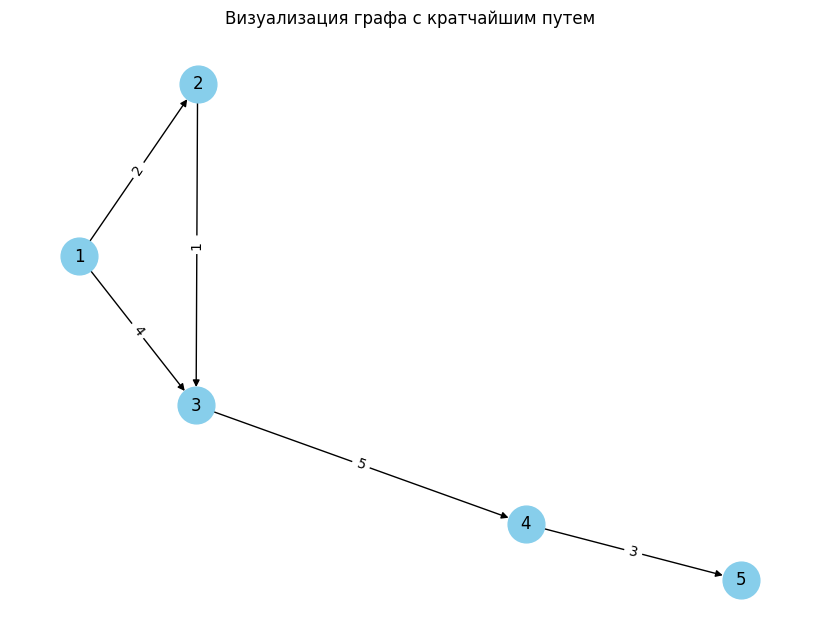

Кратчайшее расстояние: 11
Путь: [1, 2, 3, 4, 5]


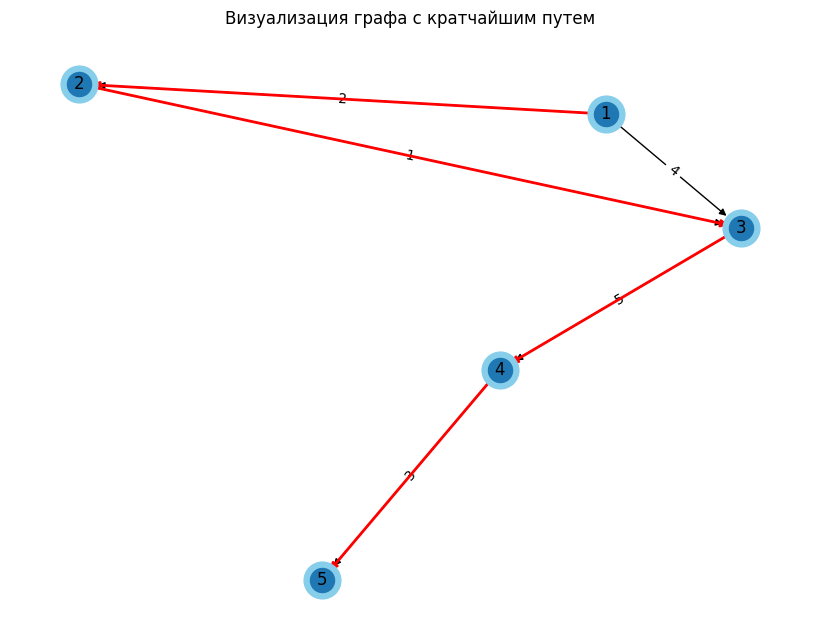


Анализ временной сложности:
  Число вершин    Число рёбер    Время (мс)
--------------  -------------  ------------
             5              5             0


In [4]:
import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

def alg_d(graph, start, end):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    previous_nodes = {node: None for node in graph.nodes}
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

        if current_node == end:
            path = []
            while previous_nodes[current_node] is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)
            return distances[end], path[::-1]

        

    return float('inf'), []

def load_graph_from_file(file_path):
    graph = nx.DiGraph()
    with open(file_path, 'r') as file:
        lines = file.readlines()

        if len(lines[0].strip().split()) > 2:  # Список рёбер
            for line in lines:
                u, v, weight = map(int, line.strip().split())
                graph.add_edge(u, v, weight=weight)
        else:  # Матрица смежности
            for i, line in enumerate(lines):
                weights = list(map(int, line.strip().split()))
                for j, weight in enumerate(weights):
                    if weight > 0:  
                        graph.add_edge(i + 1, j + 1, weight=weight)
    return graph

def draw_graph(graph, path=[]):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=700)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Визуализация графа с кратчайшим путем")
    plt.show()

def analyze_complexity(graph):
    results = []
    for size in range(5, len(graph.nodes) + 1, 5):
        start, end = 1, size  
        start_time = time.time()
        alg_d(graph, start, end)
        end_time = time.time()
        results.append([size, len(graph.edges), round((end_time - start_time) * 1000, 2)])

    print("\nАнализ временной сложности:")
    print(tabulate(results, headers=["Число вершин", "Число рёбер", "Время (мс)"]))

if __name__ == "__main__":
    file_path = input("Введите путь к файлу с графом (например, graph.txt): ")
    try:
        graph = load_graph_from_file('./graph.txt')
        draw_graph(graph)

        source = int(input("Введите начальную вершину: "))
        target = int(input("Введите конечную вершину: "))

        if source not in graph or target not in graph:
            print("Ошибка: Одна или обе вершины не существуют в графе.")
        else:
            distance, path = alg_d(graph, source, target)
            if path:
                print(f"Кратчайшее расстояние: {distance}")
                print(f"Путь: {path}")
                draw_graph(graph, path)
            else:
                print("Нет пути между вершинами.")

        analyze_complexity(graph)
    except FileNotFoundError:
        print("Ошибка: Файл не найден.")
    except ValueError:
        print("Ошибка: Некорректный формат данных в файле.")
